In [2]:
import pandas as pd
# df = pd.read_csv('sl_base_dataset_20230621.csv')
df = pd.read_csv("..\datasets\SL_outputs\sl_base_dataset_2023_06.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8020 entries, 0 to 8019
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   season    8020 non-null   int64 
 1   Date      8020 non-null   object
 2   HomeTeam  8020 non-null   object
 3   AwayTeam  8020 non-null   object
 4   FTHG      8020 non-null   int64 
 5   FTAG      8020 non-null   int64 
 6   FTR       8020 non-null   object
 7   HTHG      8020 non-null   int64 
 8   HTAG      8020 non-null   int64 
 9   HTR       8020 non-null   object
 10  HS        8020 non-null   int64 
 11  AS        8020 non-null   int64 
 12  HST       8020 non-null   int64 
 13  AST       8020 non-null   int64 
 14  HF        8020 non-null   int64 
 15  AF        8020 non-null   int64 
 16  HC        8020 non-null   int64 
 17  AC        8020 non-null   int64 
 18  HY        8020 non-null   int64 
 19  AY        8020 non-null   int64 
 20  HR        8020 non-null   int64 
 21  AR        8020

In [3]:
df.head()

,season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,1,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,14,4,13,12,6,6,1,2,0,0
1,1,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,19,14,7,7,1,2,0,0
2,1,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,15,21,8,4,5,3,1,0
3,1,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,4,6,11,13,5,8,1,1,0,0
4,1,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,8,6,21,20,6,4,1,3,0,0


In [4]:
features = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']
df = df[features]
df['TOTAL_G'] = df['FTHG'] + df['FTAG']
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,TOTAL_G
0,2000-08-19,Charlton,Man City,4,0,4
1,2000-08-19,Chelsea,West Ham,4,2,6
2,2000-08-19,Coventry,Middlesbrough,1,3,4
3,2000-08-19,Derby,Southampton,2,2,4
4,2000-08-19,Leeds,Everton,2,0,2
...,...,...,...,...,...,...
8015,2022-05-22,Crystal Palace,Man United,1,0,1
8016,2022-05-22,Leicester,Southampton,4,1,5
8017,2022-05-22,Liverpool,Wolves,3,1,4
8018,2022-05-22,Man City,Aston Villa,3,2,5


In [5]:
df.describe()

,FTHG,FTAG,TOTAL_G
count,8020.000000,8020.000000,8020.000000
mean,1.516958,1.156234,2.673192
std,1.297628,1.142172,1.664774
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000
50%,1.000000,1.000000,3.000000
75%,2.000000,2.000000,4.000000
max,9.000000,9.000000,11.000000


In [6]:
team_df = pd.read_csv('../datasets/labeled_after_clustering/agglomerative/final_result_team.csv')
team_df[['Team', 'cluster']]

,Team,cluster
0,Arsenal,2
1,Aston Villa,0
2,Bournemouth,0
3,Brighton,0
4,Burnley,6
5,Cardiff City,4
6,Chelsea,3
7,Crystal Palace,0
8,Everton,0
9,Fulham,1


In [7]:
df['AwayTeam'].unique()

array(['Man City', 'West Ham', 'Middlesbrough', 'Southampton', 'Everton',
       'Aston Villa', 'Bradford', 'Arsenal', 'Ipswich', 'Newcastle',
       'Liverpool', 'Chelsea', 'Man United', 'Tottenham', 'Charlton',
       'Sunderland', 'Derby', 'Coventry', 'Leicester', 'Leeds',
       'Blackburn', 'Bolton', 'Fulham', 'West Brom', 'Middlesboro',
       'Birmingham', 'Wolves', 'Portsmouth', 'Crystal Palace', 'Norwich',
       'Wigan', 'Watford', 'Sheffield United', 'Reading', 'Stoke', 'Hull',
       'Burnley', 'Blackpool', 'Swansea', 'QPR', 'Cardiff', 'Bournemouth',
       'Huddersfield', 'Brighton', 'Brentford'], dtype=object)

In [8]:
def change_team_name(team_name: str):
    if team_name == 'Cardiff City':
        return 'Cardiff'
    if team_name == 'Leeds United':
        return 'Leeds'
    if team_name == 'Leicester City':
        return 'Leicester'
    if team_name == 'Manchester City':
        return 'Man City'
    if team_name == 'Manchester Utd':
        return 'Man United'
    if team_name == 'Newcastle Utd':
        return 'Newcastle'
    if team_name == 'Norwich City':
        return 'Norwich'
    if team_name == 'Sheffield Utd':
        return 'Sheffield United'
    if team_name == 'Swansea City':
        return 'Swansea'
    return team_name
    

In [9]:
team_df['team_name_for_merge'] = team_df['Team'].apply(lambda x: change_team_name(x))
team_df = team_df[['team_name_for_merge', 'cluster']]
team_df

,team_name_for_merge,cluster
0,Arsenal,2
1,Aston Villa,0
2,Bournemouth,0
3,Brighton,0
4,Burnley,6
5,Cardiff,4
6,Chelsea,3
7,Crystal Palace,0
8,Everton,0
9,Fulham,1


In [10]:
df[df['AwayTeam'] == 'Arsenal']

,Date,HomeTeam,AwayTeam,FTHG,FTAG,TOTAL_G
7,2000-08-19,Sunderland,Arsenal,1,0,1
34,2000-09-06,Chelsea,Arsenal,2,2,4
39,2000-09-09,Bradford,Arsenal,1,1,2
62,2000-09-23,Ipswich,Arsenal,1,1,2
96,2000-10-21,West Ham,Arsenal,1,2,3
...,...,...,...,...,...,...
7951,2022-04-16,Southampton,Arsenal,1,0,1
7956,2022-04-20,Chelsea,Arsenal,2,4,6
7980,2022-05-01,West Ham,Arsenal,1,2,3
7997,2022-05-12,Tottenham,Arsenal,3,0,3


In [11]:
home_merge_df = df.merge(team_df, left_on=['HomeTeam'], right_on='team_name_for_merge')
home_merge_df.rename(columns={'cluster': 'HomeTeamCluster'}, inplace=True)
home_merge_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,TOTAL_G,team_name_for_merge,HomeTeamCluster
0,2000-08-19,Chelsea,West Ham,4,2,6,Chelsea,3
1,2000-09-06,Chelsea,Arsenal,2,2,4,Chelsea,3
2,2000-09-17,Chelsea,Leicester,0,2,2,Chelsea,3
3,2000-10-01,Chelsea,Liverpool,3,0,3,Chelsea,3
4,2000-10-21,Chelsea,Coventry,6,1,7,Chelsea,3
...,...,...,...,...,...,...,...,...
6020,2018-09-29,Huddersfield,Tottenham,0,2,2,Huddersfield,1
6021,2018-10-20,Huddersfield,Liverpool,0,1,1,Huddersfield,1
6022,2018-11-05,Huddersfield,Fulham,1,0,1,Huddersfield,1
6023,2018-11-10,Huddersfield,West Ham,1,1,2,Huddersfield,1


In [13]:
final_merge_df = home_merge_df.merge(team_df, left_on=['AwayTeam'], right_on='team_name_for_merge')
final_merge_df.rename(columns={'cluster': 'AwayTeamCluster'}, inplace=True)


In [14]:
final_merge_df = final_merge_df[['Date','HomeTeam','AwayTeam','FTHG','FTAG','TOTAL_G','HomeTeamCluster','AwayTeamCluster']]
final_merge_df.dropna(axis=1, inplace=True)

In [15]:
final_merge_df


,Date,HomeTeam,AwayTeam,FTHG,FTAG,TOTAL_G,HomeTeamCluster,AwayTeamCluster
0,2000-08-19,Chelsea,West Ham,4,2,6,3,0
1,2002-01-20,Chelsea,West Ham,5,1,6,3,0
2,2002-09-28,Chelsea,West Ham,2,3,5,3,0
3,2006-04-09,Chelsea,West Ham,4,1,5,3,0
4,2006-11-18,Chelsea,West Ham,1,0,1,3,0
...,...,...,...,...,...,...,...,...
4605,2020-01-01,Brighton,Chelsea,1,1,2,0,3
4606,2020-09-14,Brighton,Chelsea,1,3,4,0,3
4607,2022-01-18,Brighton,Chelsea,1,1,2,0,3
4608,2017-12-12,Huddersfield,Chelsea,1,3,4,1,3


In [16]:
final_merge_df_sorted = final_merge_df.sort_values('Date')

In [17]:
final_merge_df_sorted

,Date,HomeTeam,AwayTeam,FTHG,FTAG,TOTAL_G,HomeTeamCluster,AwayTeamCluster
0,2000-08-19,Chelsea,West Ham,4,2,6,3,0
1702,2000-08-19,Leicester,Aston Villa,0,0,0,2,0
2735,2000-08-19,Leeds,Everton,2,0,2,2,0
2004,2000-08-20,Man United,Newcastle,2,0,2,2,6
793,2000-08-21,Arsenal,Liverpool,2,0,2,2,3
...,...,...,...,...,...,...,...,...
253,2022-05-22,Brighton,West Ham,3,1,4,0,0
3753,2022-05-22,Chelsea,Watford,2,1,3,3,0
2836,2022-05-22,Arsenal,Everton,5,1,6,2,0
3405,2022-05-22,Liverpool,Wolves,3,1,4,3,0


In [18]:
# set home and away teams
HOME_TEAM = 'Chelsea'
AWAY_TEAM = 'West Ham'
PREDICT_DATE = '2022-05-22'

In [19]:
def get_home_filtered_dataset(df, home_team:str, away_team:str, predict_date:str):
    previous_df = df[df['Date'] < predict_date]
    
    home_team_stats = previous_df[previous_df['HomeTeam'] == home_team]
    away_team_cluster = df[df['AwayTeam'] == away_team]['AwayTeamCluster'].unique()[0]
    
    home_team_stats_with_away_cluster = home_team_stats[home_team_stats['AwayTeamCluster'] == away_team_cluster]
    
    if home_team_stats_with_away_cluster.shape[0] > 30:
        return home_team_stats_with_away_cluster.sort_values('Date', ascending=False)[:30]
    
    return home_team_stats_with_away_cluster
    
    
def get_away_filtered_dataset(df, home_team:str, away_team:str, predict_date:str):
    previous_df = df[df['Date'] < predict_date]
    
    away_team_stats = previous_df[previous_df['AwayTeam'] == away_team]
    home_team_cluster = df[df['HomeTeam'] == home_team]['HomeTeamCluster'].unique()[0]
    
    away_team_stats_with_away_cluster = away_team_stats[away_team_stats['HomeTeamCluster'] == home_team_cluster]
    
    if away_team_stats_with_away_cluster.shape[0] > 30:
        return away_team_stats_with_away_cluster.sort_values('Date', ascending=False)[:30]
    
    return away_team_stats_with_away_cluster
    

In [20]:
# filter out the dataset 
home_predict_datasets = get_home_filtered_dataset(final_merge_df_sorted, HOME_TEAM, AWAY_TEAM, PREDICT_DATE)
home_predict_datasets

,Date,HomeTeam,AwayTeam,FTHG,FTAG,TOTAL_G,HomeTeamCluster,AwayTeamCluster
3390,2022-05-07,Chelsea,Wolves,2,2,4,3,0
17,2022-04-24,Chelsea,West Ham,1,0,1,3,0
4215,2021-12-29,Chelsea,Brighton,1,1,2,3,0
2734,2021-12-16,Chelsea,Everton,1,1,2,3,0
2510,2021-10-02,Chelsea,Southampton,3,1,4,3,0
1695,2021-09-11,Chelsea,Aston Villa,3,0,3,3,0
3605,2021-08-14,Chelsea,Crystal Palace,3,0,3,3,0
4214,2021-04-20,Chelsea,Brighton,0,0,0,3,0
2733,2021-03-08,Chelsea,Everton,2,0,2,3,0
3389,2021-01-27,Chelsea,Wolves,0,0,0,3,0


In [21]:
# Home teams' goal data
home_total = home_predict_datasets[['FTHG']].sum()
home_average = home_predict_datasets[['FTHG']].mean()

home_conceed_total = home_predict_datasets[['FTAG']].sum()
home_conceed_average = home_predict_datasets[['FTAG']].mean()


In [22]:
# filter out the dataset 
away_predict_datasets = get_away_filtered_dataset(final_merge_df_sorted, HOME_TEAM, AWAY_TEAM, PREDICT_DATE)
away_predict_datasets

,Date,HomeTeam,AwayTeam,FTHG,FTAG,TOTAL_G,HomeTeamCluster,AwayTeamCluster
17,2022-04-24,Chelsea,West Ham,1,0,1,3,0
50,2022-03-05,Liverpool,West Ham,1,0,1,3,0
16,2020-12-21,Chelsea,West Ham,3,0,3,3,0
49,2020-10-31,Liverpool,West Ham,2,1,3,3,0
15,2019-11-30,Chelsea,West Ham,0,1,1,3,0
48,2018-08-12,Liverpool,West Ham,4,0,4,3,0
14,2018-04-08,Chelsea,West Ham,1,1,2,3,0
47,2018-02-24,Liverpool,West Ham,4,1,5,3,0
46,2016-12-11,Liverpool,West Ham,2,2,4,3,0
13,2016-08-15,Chelsea,West Ham,2,1,3,3,0


In [23]:
# Away team's goal data
away_total = away_predict_datasets[['FTAG']].sum()
away_average = away_predict_datasets[['FTAG']].mean()

away_conceed_total = away_predict_datasets[['FTHG']].sum()
away_conceed_average = away_predict_datasets[['FTHG']].mean()

In [24]:
final_merge_df_sorted.describe()

,FTHG,FTAG,TOTAL_G,HomeTeamCluster,AwayTeamCluster
count,4610.000000,4610.000000,4610.000000,4610.000000,4610.000000
mean,1.540347,1.199783,2.740130,2.140781,2.137744
std,1.301317,1.182519,1.684916,2.029594,2.027771
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,3.000000,2.000000,2.000000
75%,2.000000,2.000000,4.000000,3.000000,3.000000
max,9.000000,9.000000,10.000000,6.000000,6.000000


In [25]:
final_merge_df_sorted

,Date,HomeTeam,AwayTeam,FTHG,FTAG,TOTAL_G,HomeTeamCluster,AwayTeamCluster
0,2000-08-19,Chelsea,West Ham,4,2,6,3,0
1702,2000-08-19,Leicester,Aston Villa,0,0,0,2,0
2735,2000-08-19,Leeds,Everton,2,0,2,2,0
2004,2000-08-20,Man United,Newcastle,2,0,2,2,6
793,2000-08-21,Arsenal,Liverpool,2,0,2,2,3
...,...,...,...,...,...,...,...,...
253,2022-05-22,Brighton,West Ham,3,1,4,0,0
3753,2022-05-22,Chelsea,Watford,2,1,3,3,0
2836,2022-05-22,Arsenal,Everton,5,1,6,2,0
3405,2022-05-22,Liverpool,Wolves,3,1,4,3,0


In [26]:
AVG_HOME_GOAL = 1.540347
STD_HOME_GOAL = 1.301317
AVG_AWAY_GOAL = 1.199783
STD_AWAY_GOAL = 1.182519

In [27]:
home_goal = (home_average + away_conceed_average)/2
home_goal

FTHG    1.833333
dtype: float64

In [28]:
away_goal = (away_average + home_conceed_average)/2
away_goal

FTAG    0.65
dtype: float64

In [29]:
from scipy import stats
import numpy as np
home_exp_dist = np.random.poisson(home_goal, 10000)
home_exp_goal = stats.mode(home_exp_dist)[0]
away_exp_dist = np.random.poisson(away_goal, 10000)
away_exp_goal = stats.mode(away_exp_dist)[0]

print(f'The scoreline is {HOME_TEAM} {home_exp_goal}:{AWAY_TEAM} {away_exp_goal}')

The scoreline is Chelsea [1]:West Ham [0]


C:\Users\Erick\AppData\Local\Temp\ipykernel_14944\1311419446.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  home_exp_goal = stats.mode(home_exp_dist)[0]
C:\Users\Erick\AppData\Local\Temp\ipykernel_14944\1311419446.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warn

                  0
count  10000.000000
mean       1.835000
std        1.372065
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000


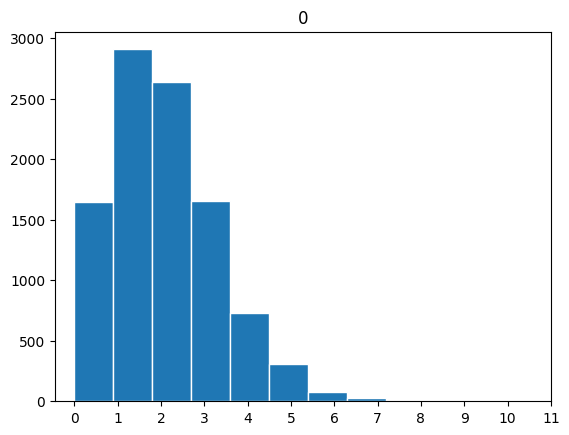

In [31]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

plot_df=pd.DataFrame(home_exp_dist)
print (plot_df.describe())
plot_df.hist(bins=10,edgecolor='white')
plt.xticks(range(12))
plt.grid(False)

                 0
count  10000.00000
mean       0.64780
std        0.80599
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        6.00000


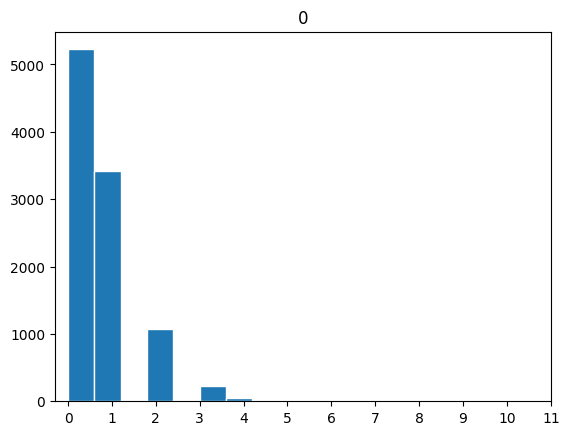

In [32]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

plot_df=pd.DataFrame(away_exp_dist)
print (plot_df.describe())
plot_df.hist(bins=10,edgecolor='white')
plt.xticks(range(12))
plt.grid(False)

In [37]:
def get_winning_percentage(home_exp_dist, away_exp_dist):

    if len(home_exp_dist) != len(away_exp_dist):
        raise Exception('length of dists are not equal!!!')


    try:
        home_vs_away = home_exp_dist - away_exp_dist
        home_win_cnt = len(list(filter(lambda x: x > 0, home_vs_away)))
        away_win_cnt = len(list(filter(lambda x: x < 0, home_vs_away)))
        draw_cnt = len(list(filter(lambda x: x == 0, home_vs_away)))
        total_cnt = len(home_vs_away)

        home_win_pct = 100*home_win_cnt/total_cnt
        away_win_pct = 100*away_win_cnt/total_cnt
        draw_pct = 100*draw_cnt/total_cnt

        return home_win_pct, away_win_pct, draw_pct
    except:
        return None, None, None





In [38]:
get_winning_percentage(home_exp_dist, away_exp_dist)

(65.72, 12.73, 21.55)

In [39]:
# combining prediction dataset to original dataset
def get_predict_result(merged_df, home_team, away_team, predict_date, n_of_events):
    ''' input : home_team, away_team, and the date to predict
        output: home_team's winning percentage, 
                away_team's winning percentage,
                draw percentage,
                home_team's most expected goals,
                away_team's most expected goals
    '''
    
    # last 30 games data againt teams in same cluster with the opponent befer the predict_date
    home_datasets = get_home_filtered_dataset(merged_df, home_team, away_team, predict_date)
    away_datasets = get_away_filtered_dataset(merged_df, home_team, away_team, predict_date)
    
    if len(home_datasets) < 30 or len(away_datasets) < 30:
        return None, None, None, None, None
    
    # Home teams' goal data
    home_average = home_datasets[['FTHG']].mean()
    home_conceed_average = home_datasets[['FTAG']].mean()
    
     # Away team's goal data
    away_average = away_datasets[['FTAG']].mean()
    away_conceed_average = away_datasets[['FTHG']].mean()

    # to use poisson disribution, get the average values
    home_exp_goal = (home_average + away_conceed_average)/2
    away_exp_goal = (away_average + home_conceed_average)/2
    
    # get poission distribution with the expected values
    from scipy import stats
    import numpy as np
    home_exp_dist = np.random.poisson(home_exp_goal, n_of_events)
    home_exp_goal = stats.mode(home_exp_dist)[0]
    away_exp_dist = np.random.poisson(away_exp_goal, n_of_events)
    away_exp_goal = stats.mode(away_exp_dist)[0]
     
    home_team_winning_pct, away_team_winning_pct, draw_pct = get_winning_percentage(home_exp_dist, away_exp_dist)
    
    return home_team_winning_pct, away_team_winning_pct, draw_pct, home_exp_goal, away_exp_goal

    
    
    

In [40]:
merged_df = final_merge_df.copy()
merged_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,TOTAL_G,HomeTeamCluster,AwayTeamCluster
0,2000-08-19,Chelsea,West Ham,4,2,6,3,0
1,2002-01-20,Chelsea,West Ham,5,1,6,3,0
2,2002-09-28,Chelsea,West Ham,2,3,5,3,0
3,2006-04-09,Chelsea,West Ham,4,1,5,3,0
4,2006-11-18,Chelsea,West Ham,1,0,1,3,0
...,...,...,...,...,...,...,...,...
4605,2020-01-01,Brighton,Chelsea,1,1,2,0,3
4606,2020-09-14,Brighton,Chelsea,1,3,4,0,3
4607,2022-01-18,Brighton,Chelsea,1,1,2,0,3
4608,2017-12-12,Huddersfield,Chelsea,1,3,4,1,3


In [42]:
# final_merge_df[['home_winning_pct','away_winning_pct','draw_pct','home_exp_goal','away_exp_goal']] = final_merge_df.apply(lambda x : get_predict_result(merged_df, x['HomeTeam'], x['AwayTeam'], x['Date'], 10000), axis=1)

In [ ]:
final_merge_df